<a href="https://colab.research.google.com/github/Celeness/securityfoodtable/blob/main/Assignment_(International_food_security).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1200x600 with 0 Axes>

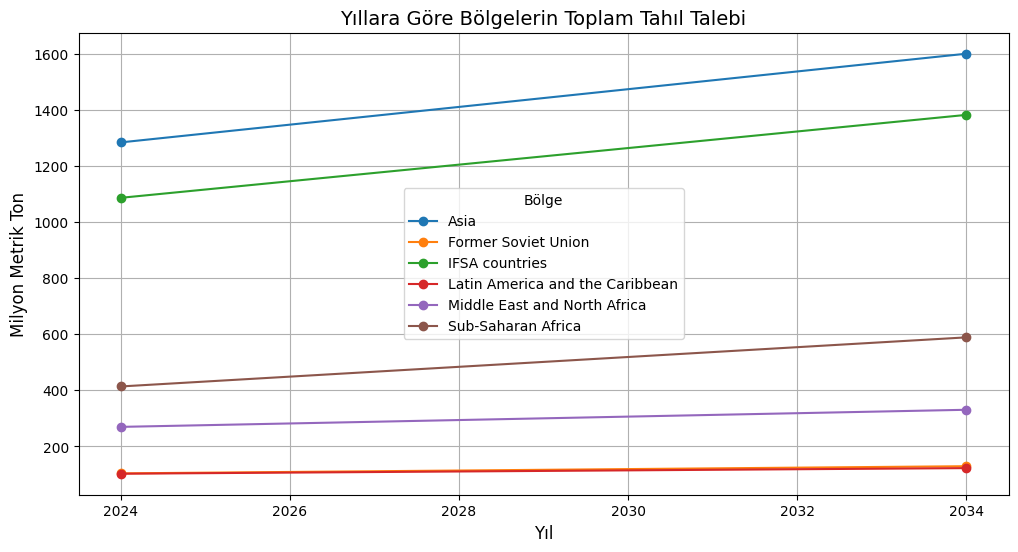

In [ ]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import matplotlib.pyplot as plt

# GitHub'daki dosyanızın ham (raw) URL'si
url = 'https://raw.githubusercontent.com/Celeness/securityfoodtable/main/GrainDemandProduction.csv'

# Veriyi pandas ile okuma
data = pd.read_csv(url)

# Eksik değerleri doldurma
data['Dataset'] = data['Dataset'].fillna('Unknown')
data['Element'] = data['Element'].fillna('Unknown')
data['Region'] = data['Region'].fillna('Unknown')
data['Sub-region'] = data['Sub-region'].fillna('Unknown')
data['Year'] = data['Year'].fillna(data['Year'].mean())
data['Millions of metric tons'] = data['Millions of metric tons'].fillna(data['Millions of metric tons'].mean())


# "Total grain demand" filtresi
total_grain_demand = data[data['Element'] == 'Total grain demand']

# Bölgeler bazında yıllara göre toplam talep
region_demand = total_grain_demand.groupby(['Year', 'Region'])['Millions of metric tons'].sum().unstack()

# **Çizgi Grafiği**: Yıllara Göre Bölgelerin Toplam Talebi
plt.figure(figsize=(12, 6))
region_demand.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Yıllara Göre Bölgelerin Toplam Tahıl Talebi', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Milyon Metrik Ton', fontsize=12)
plt.grid(True)
plt.legend(title='Bölge', fontsize=10)
plt.show()

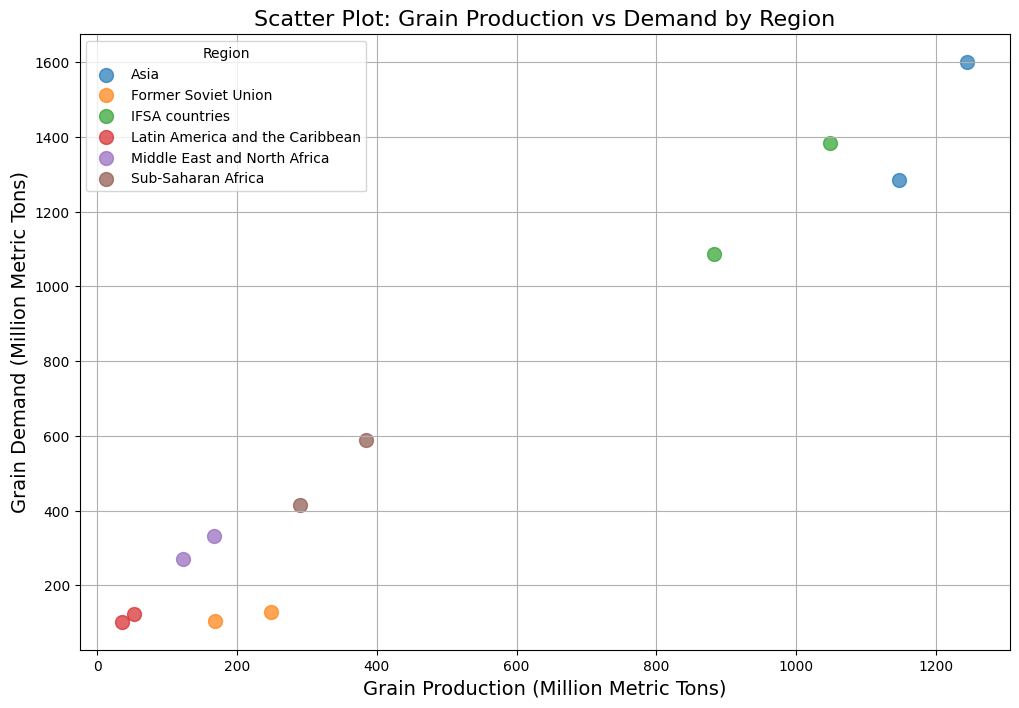

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub'daki dosyanızın ham (raw) URL'si
url = 'https://raw.githubusercontent.com/Celeness/securityfoodtable/main/GrainDemandProduction.csv'

# Veriyi pandas ile okuma
data = pd.read_csv(url)

# Filter data (if needed)
filtered_data = data[(data['Element'] == 'Total grain demand') | (data['Element'] == 'Grain production')]

# Prepare data for scatter plot
scatter_data = filtered_data.groupby(['Year', 'Region', 'Element'])['Millions of metric tons'].sum().reset_index()
demand_data = scatter_data[scatter_data['Element'] == 'Total grain demand']
production_data = scatter_data[scatter_data['Element'] == 'Grain production']

# Merge demand and production data
merged_data = pd.merge(demand_data, production_data, on=['Year', 'Region'], suffixes=('_demand', '_production'))

# Create scatter plot
plt.figure(figsize=(12, 8))
for region in merged_data['Region'].unique():
    region_data = merged_data[merged_data['Region'] == region]
    plt.scatter(
        region_data['Millions of metric tons_production'],
        region_data['Millions of metric tons_demand'],
        label=region,
        s=100,  # Size of the points
        alpha=0.7
    )

# Customize plot
plt.title("Scatter Plot: Grain Production vs Demand by Region", fontsize=16)
plt.xlabel("Grain Production (Million Metric Tons)", fontsize=14)
plt.ylabel("Grain Demand (Million Metric Tons)", fontsize=14)
plt.legend(title="Region", fontsize=10, loc="upper left")
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# GitHub'daki dosyanızın ham (raw) URL'si
url = 'https://raw.githubusercontent.com/Celeness/securityfoodtable/main/GrainDemandProduction.csv'

# Veriyi pandas ile okuma
data = pd.read_csv(url)

# Filter and prepare data
# Focus on grain production and demand
filtered_data = data[(data['Element'] == 'Total grain demand') | (data['Element'] == 'Grain production')]

# Group data by year, region, and element
scatter_data = filtered_data.groupby(['Year', 'Region', 'Element'])['Millions of metric tons'].sum().reset_index()

# Separate demand and production data
demand_data = scatter_data[scatter_data['Element'] == 'Total grain demand']
production_data = scatter_data[scatter_data['Element'] == 'Grain production']

# Merge demand and production data
merged_data = pd.merge(demand_data, production_data, on=['Year', 'Region'], suffixes=('_demand', '_production'))

#Create interactive scatter plot
fig = px.scatter(
    merged_data,
    x='Millions of metric tons_production',
    y='Millions of metric tons_demand',
    color='Region',
    size='Millions of metric tons_demand',  # Point size based on demand
    hover_data={
        'Year': True,  # Include year in hover tooltip
        'Millions of metric tons_production': ':.2f',  # Format production value
        'Millions of metric tons_demand': ':.2f'  # Format demand value
    },
    title="Interactive Scatter Plot: Grain Production vs Demand by Region",
    labels={
        "Millions of metric tons_production": "Grain Production (M Metric Tons)",
        "Millions of metric tons_demand": "Grain Demand (M Metric Tons)"
    }
)

# Add interactivity features
fig.update_traces(
    marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')),  # Add border to points
    selector=dict(mode='markers')
)

# Update layout for zooming and panning
fig.update_layout(
    xaxis=dict(title="Grain Production (M Metric Tons)", zeroline=False),
    yaxis=dict(title="Grain Demand (M Metric Tons)", zeroline=False),
    hovermode="closest",  # Highlight closest point on hover
    template="plotly_white"
)
# Show the plot
fig.show()


In [ ]:
ssfrom bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Span
from bokeh.io import push_notebook

# Create a ColumnDataSource
source = ColumnDataSource(merged_data)

# Create the scatter plot
p = figure(
    title="Gliph:Grain Production vs Demand by Region",
    x_axis_label="Grain Production (M Metric Tons)",
    y_axis_label="Grain Demand (M Metric Tons)",
    width=800,
    height=600,
    tools="pan,box_zoom,reset,save"
)

# Scatter points with color by region
p.scatter(
    x='Millions of metric tons_production',
    y='Millions of metric tons_demand',
    size=12,
    source=source,
    color="navy",
    alpha=0.6,
    legend_field="Region"
)
from bokeh.transform import factor_cmap

# List of unique regions
regions = list(merged_data['Region'].unique())

# Map regions to colors
region_colors = factor_cmap(
    'Region',
    palette=['blue', 'green', 'red', 'purple', 'orange', 'brown'],  # Define color palette
    factors=regions
)

# Update scatter plot with color by region
p.scatter(
    x='Millions of metric tons_production',
    y='Millions of metric tons_demand',
    size=12,
    source=source,
    color=region_colors,
    alpha=0.6,
    legend_field="Region"
)

# Adjust legend for better visualization
p.legend.title = "Region"
p.legend.location = "top_left"
p.legend.click_policy = "hide"  # Add interactivity to hide/show regions


# Add diagonal reference line
# Add diagonal reference line (y = x)
from bokeh.models import Slope

slope = Slope(gradient=1, y_intercept=0, line_color="red", line_dash="dashed", line_width=2)
p.add_layout(slope)


# Add hover tooltips
hover = HoverTool(
    tooltips=[
        ("Region", "@Region"),
        ("Year", "@Year"),
        ("Production", "@{Millions of metric tons_production}{{0.2f}} M Metric Tons"),
        ("Demand", "@{Millions of metric tons_demand}{{0.2f}} M Metric Tons"),
        ("Mismatch", "@{Millions of metric tons_production} - @{Millions of metric tons_demand}")
    ]
)
plt.show()
p.add_tools(hover)

# Customize legend
p.legend.title = "Region"
p.legend.location = "top_left"

# Show the plot
output_notebook()
show(p, notebook_handle=True)

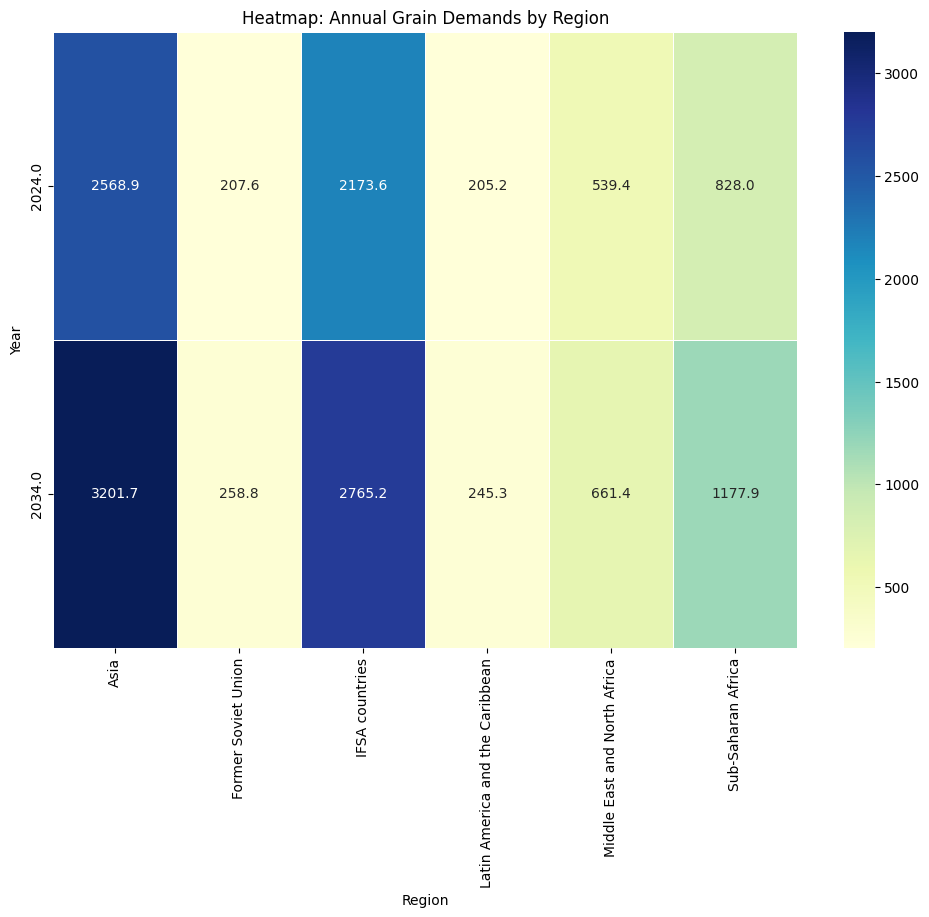

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# GitHub'daki dosyanızın ham (raw) URL'si
url = 'https://raw.githubusercontent.com/Celeness/securityfoodtable/main/GrainDemandProduction.csv'

# Veriyi pandas ile okuma
data = pd.read_csv(url)
data.columns = data.columns.str.strip()
data = data[data["Element"].isin(["Food grain demand", "Other grain demand", "Total grain demand"])]
data = data.dropna()

# Pivot the data for the heatmap
heatmap_pivot = data.pivot_table(index="Year", columns="Region", values="Millions of metric tons", aggfunc="sum")

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Annual Grain Demands by Region")
plt.xlabel("Region")
plt.ylabel("Year")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Example data - Replace this with your actual dataset
data = {
    "Year": [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031],
    "Region": [
        "Asia", "Former Soviet Union", "IFSA countries",
        "Latin America and the Caribbean", "Middle East and North Africa",
        "Sub-Saharan Africa", "Asia", "Former Soviet Union",
        "IFSA countries", "Latin America and the Caribbean",
        "Middle East and North Africa", "Sub-Saharan Africa"
    ],
    "Millions of Metric Tons": [
        2568.9, 207.6, 2173.6, 205.2, 539.4, 828.0,
        3201.7, 258.8, 2765.2, 245.3, 661.4, 1177.9
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create an interactive heatmap
fig = px.density_heatmap(
    df,
    x="Region",
    y="Year",
    z="Millions of Metric Tons",
    color_continuous_scale="YlGnBu",  # Color gradient
    title="Interactive Heatmap: Annual Grain Demands by Region",
    labels={"Millions of Metric Tons": "Grain Demand (M Metric Tons)"}  # Custom hover label
)

# Add interactivity
fig.update_traces(
    hovertemplate=(
        "Region: %{x}<br>" +
        "Year: %{y}<br>" +
        "Grain Demand: %{z:.1f} M Metric Tons<extra></extra>"
    )  # Custom tooltip
)

# Enhance layout for zooming/panning
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Year",
    hovermode="closest",  # Highlight the nearest cell
    template="plotly_white"  # Clean theme
)

# Show the interactive heatmap
fig.show()


<ipython-input-51-fe297483d16e>:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




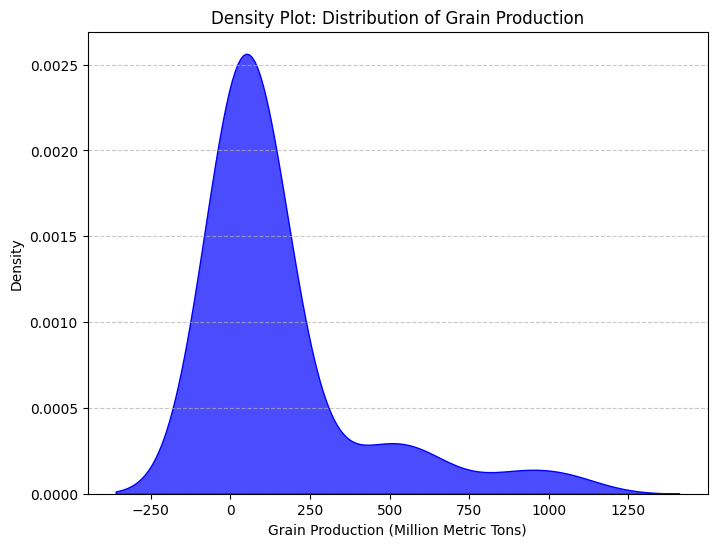

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter the data

# GitHub'daki dosyanızın ham (raw) URL'si
url = 'https://raw.githubusercontent.com/Celeness/securityfoodtable/main/GrainDemandProduction.csv'

# Veriyi pandas ile okuma
data = pd.read_csv(url)
data.columns = data.columns.str.strip()
density_data = data[data["Element"] == "Grain production"]["Millions of metric tons"]

# Create the density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(density_data, shade=True, color="blue", alpha=0.7)
plt.title("Density Plot: Distribution of Grain Production")
plt.xlabel("Grain Production (Million Metric Tons)")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# Example data - replace with your actual data
# Assuming "density_data" is the column containing your grain production values
density_data = np.random.normal(loc=500, scale=100, size=1000)  # Example data

# Creating the density plot
fig = ff.create_distplot(
    [density_data],  # List of datasets
    group_labels=["Grain Production"],  # Labels for the dataset
    show_hist=False,  # Hide the histogram
    show_rug=True  # Show the rug plot (small ticks at data points)
)

# Updating layout for better interactivity and appearance
fig.update_layout(
    title="Interactive Density Plot: Distribution of Grain Production",
    xaxis_title="Grain Production (Million Metric Tons)",
    yaxis_title="Density",
    template="plotly_white",  # Clean and minimal theme
    hovermode="x",  # Show hover information along the x-axis
)

# Show the figure
fig.show()


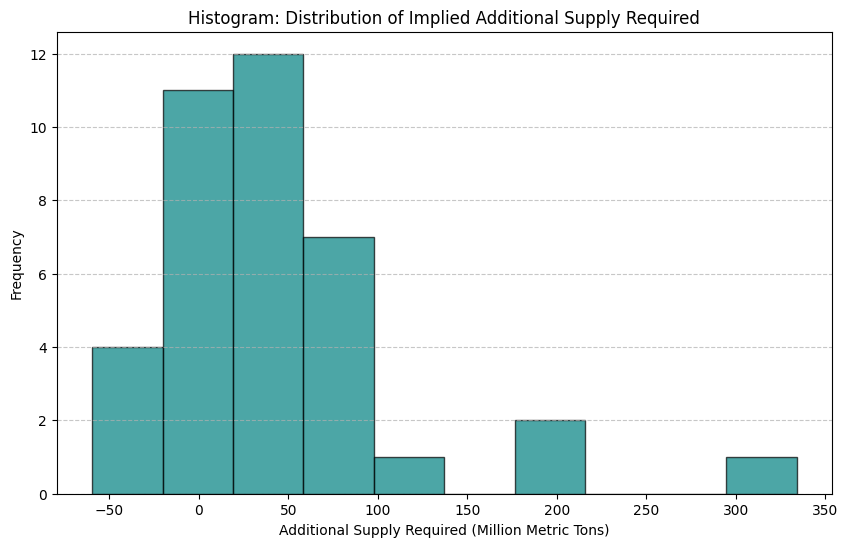

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for "Implied additional supply required"
histogram_data = data[data["Element"] == "Implied additional supply required"]["Millions of metric tons"]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(histogram_data, bins=10, color='teal', edgecolor='black', alpha=0.7)
plt.title("Histogram: Distribution of Implied Additional Supply Required")
plt.xlabel("Additional Supply Required (Million Metric Tons)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
